In [17]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [11]:
#Generate the dataset
genes = ['gene' + str(i) for i in range(1, 101)] #gene1, gene2, gene3...
wk = ['wk' + str(i) for i in range(1, 6)] #wild sample
ko = ['ko' + str(i) for i in range(1, 6)] #knock out sample

data = pd.DataFrame(columns = [*wt, *ko], index = genes)

In [12]:
#Fill the data with random values from poisson distributions
for gene in genes:
    data.loc[gene, 'wk1':'wk5'] = np.random.poisson(lam=rd.randrange(10,1000), size = 5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size = 5)

In [13]:
print(data.head())

       wk1  wk2  wk3  wk4  wk5  ko1  ko2  ko3  ko4  ko5
gene1  789  805  777  820  782  816  802  787  838  786
gene2  569  619  577  594  595  437  462  491  459  401
gene3  738  754  828  762  760  190  191  218  177  182
gene4  242  241  220  204  206  512  579  544  515  549
gene5  592  618  637  706  627  364  381  308  350  372


In [16]:
print(data.shape)

(100, 10)


In [20]:
#center and scale the data, mean would be 0 for each gene and std would be 1
#scaled_data = preprocessing.scale(data.T) #Transpose the data
scaled_data = StandardScaler().fit_transform(data.T)

D:\Anacoda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anacoda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [21]:
#Do the PCA
pca = PCA()
pca.fit(scaled_data)
pca.data = pca.transform(scaled_data)

In [23]:
#Percentage variance of each pca component stands for
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
#Create labels for the scree plot
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

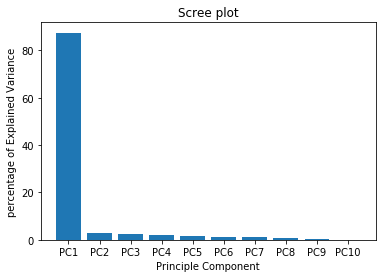

In [24]:
#Plot the data
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('percentage of Explained Variance')
plt.xlabel('Principle Component')
plt.title('Scree plot')
plt.show()

Almost all the variance is explained by the PC1 and PC2 component

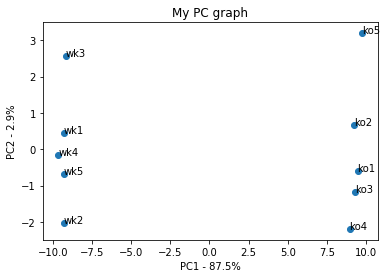

In [28]:
#draw a pca plot
pca_df = pd.DataFrame(pca.data, index = [*wt, *ko], columns = labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.title('My PC graph')

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

WT samples and KO samples are correlated to each other

In [29]:
loading_scores = pd.Series(pca.components_[0], index=genes) #pd series with loading scores in PC1
sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)

top_10_genes = sorted_loading_scores[0:10].index.values

print(loading_scores[top_10_genes])

gene89    0.106856
gene66    0.106827
gene24    0.106822
gene27    0.106799
gene43   -0.106799
gene84   -0.106784
gene34   -0.106769
gene15    0.106764
gene58   -0.106760
gene79    0.106747
dtype: float64


These genes are responsible for spliting the samples